<a href="https://colab.research.google.com/github/Harsh-BH/ML-Projects/blob/main/Fraud_Detection_Guided_Assignment_SOQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<h1 align='center' style="color:green"> Credit Card Fraud Detection</h1>

---

## 1. Importing Necessary Libraries

In [1]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Load The Data Set
In the following cells, we will import our dataset from a .csv file as a Pandas DataFrame.  Furthermore, we will begin exploring the dataset to gain an understanding of the type, quantity, and distribution of data in our dataset.  For this purpose, we will use Pandas' built-in describe feature, as well as parameter histograms and a correlation matrix.

## Download the dataset from there <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud#creditcard.csv" >click here </a>  

Use : [read_csv](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Load the dataset from the csv file using pandas. and then print first few columns using .head()
df= pd.read_csv("/content/creditcard.csv")
print(df.head())
print(df.dtypes)


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

### EXPLORE THE DATA

**Print the columns**

In [21]:
# Write the code to print column names.
df.columns
df_1= df.Class[df.Class==1]
df_1
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


**Print the shape and description**

In [24]:
# Print the shape of the data

print(df.shape)

#print description
print(df.describe())

(45646, 31)
               Time            V1            V2            V3            V4  \
count  45646.000000  45646.000000  45646.000000  45646.000000  45646.000000   
mean   27545.441331     -0.237544      0.028942      0.696718      0.191505   
std    12907.770469      1.886548      1.613070      1.530553      1.403936   
min        0.000000    -56.407510    -72.715728    -32.965346     -5.172595   
25%    19891.000000     -0.985248     -0.543868      0.222804     -0.714566   
50%    32447.000000     -0.246259      0.088873      0.801638      0.191835   
75%    37571.750000      1.157412      0.739723      1.434911      1.070924   
max    42437.000000      1.960497     18.183626      4.101716     16.491217   

                 V5            V6            V7            V8            V9  \
count  45646.000000  45645.000000  45645.000000  45645.000000  45645.000000   
mean      -0.248407      0.098588     -0.117937      0.053331      0.157893   
std        1.414608      1.308548      

**Verify the absence of null values**

Use `data = data.dropna()`,if any.

In [26]:
df.isna().sum()  # Run, and ensure removal if any.

df = df.dropna()

## Data Visualization

Plot the histograms of each parameter, using .hist() in Matplotlib, and ultimately plt.show(). Learn more about how to do this, by searching online. Note, this is a straightforward code taking no more than 2 lines.

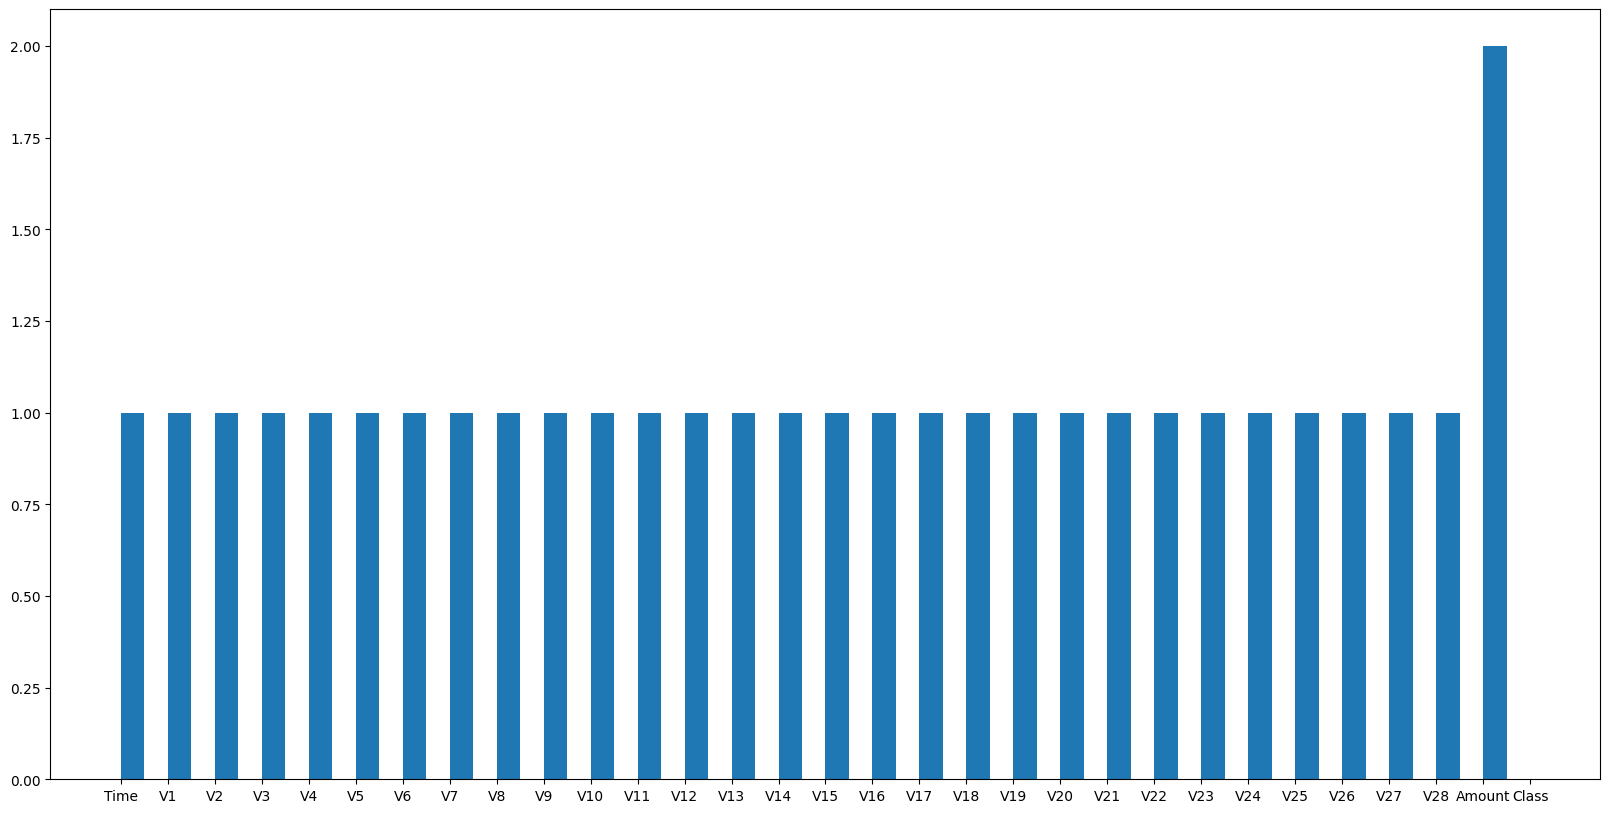

In [33]:
# Plot histograms of each parameter
plt.figure(figsize=(20,10))
plt.hist(df.columns , width =0.5 , bins=30)
plt.show()

**Print the number of**
  1. **Fraud cases**
  2.**Valid Cases**   **from the dataset**

  Do this part by **Boolean Indexing**.


In [34]:
# Determine number of 1.fraud cases, 2. valid cases.
fraud_cases= df.Class[df.Class==1]
valid_cases= df.Class[df.Class==0]
print(len(fraud_cases))
print(len(valid_cases))
#code goes here:




142
45503


**Plot a correlation heatmap using the Seaborn Library(Example)**

Search these up.

1.   pandas.DataFrame.corr
2.   seaborn.heatmap
3.   matplotlib.pyplot.figure
4.   matplotlib.pyplot.show












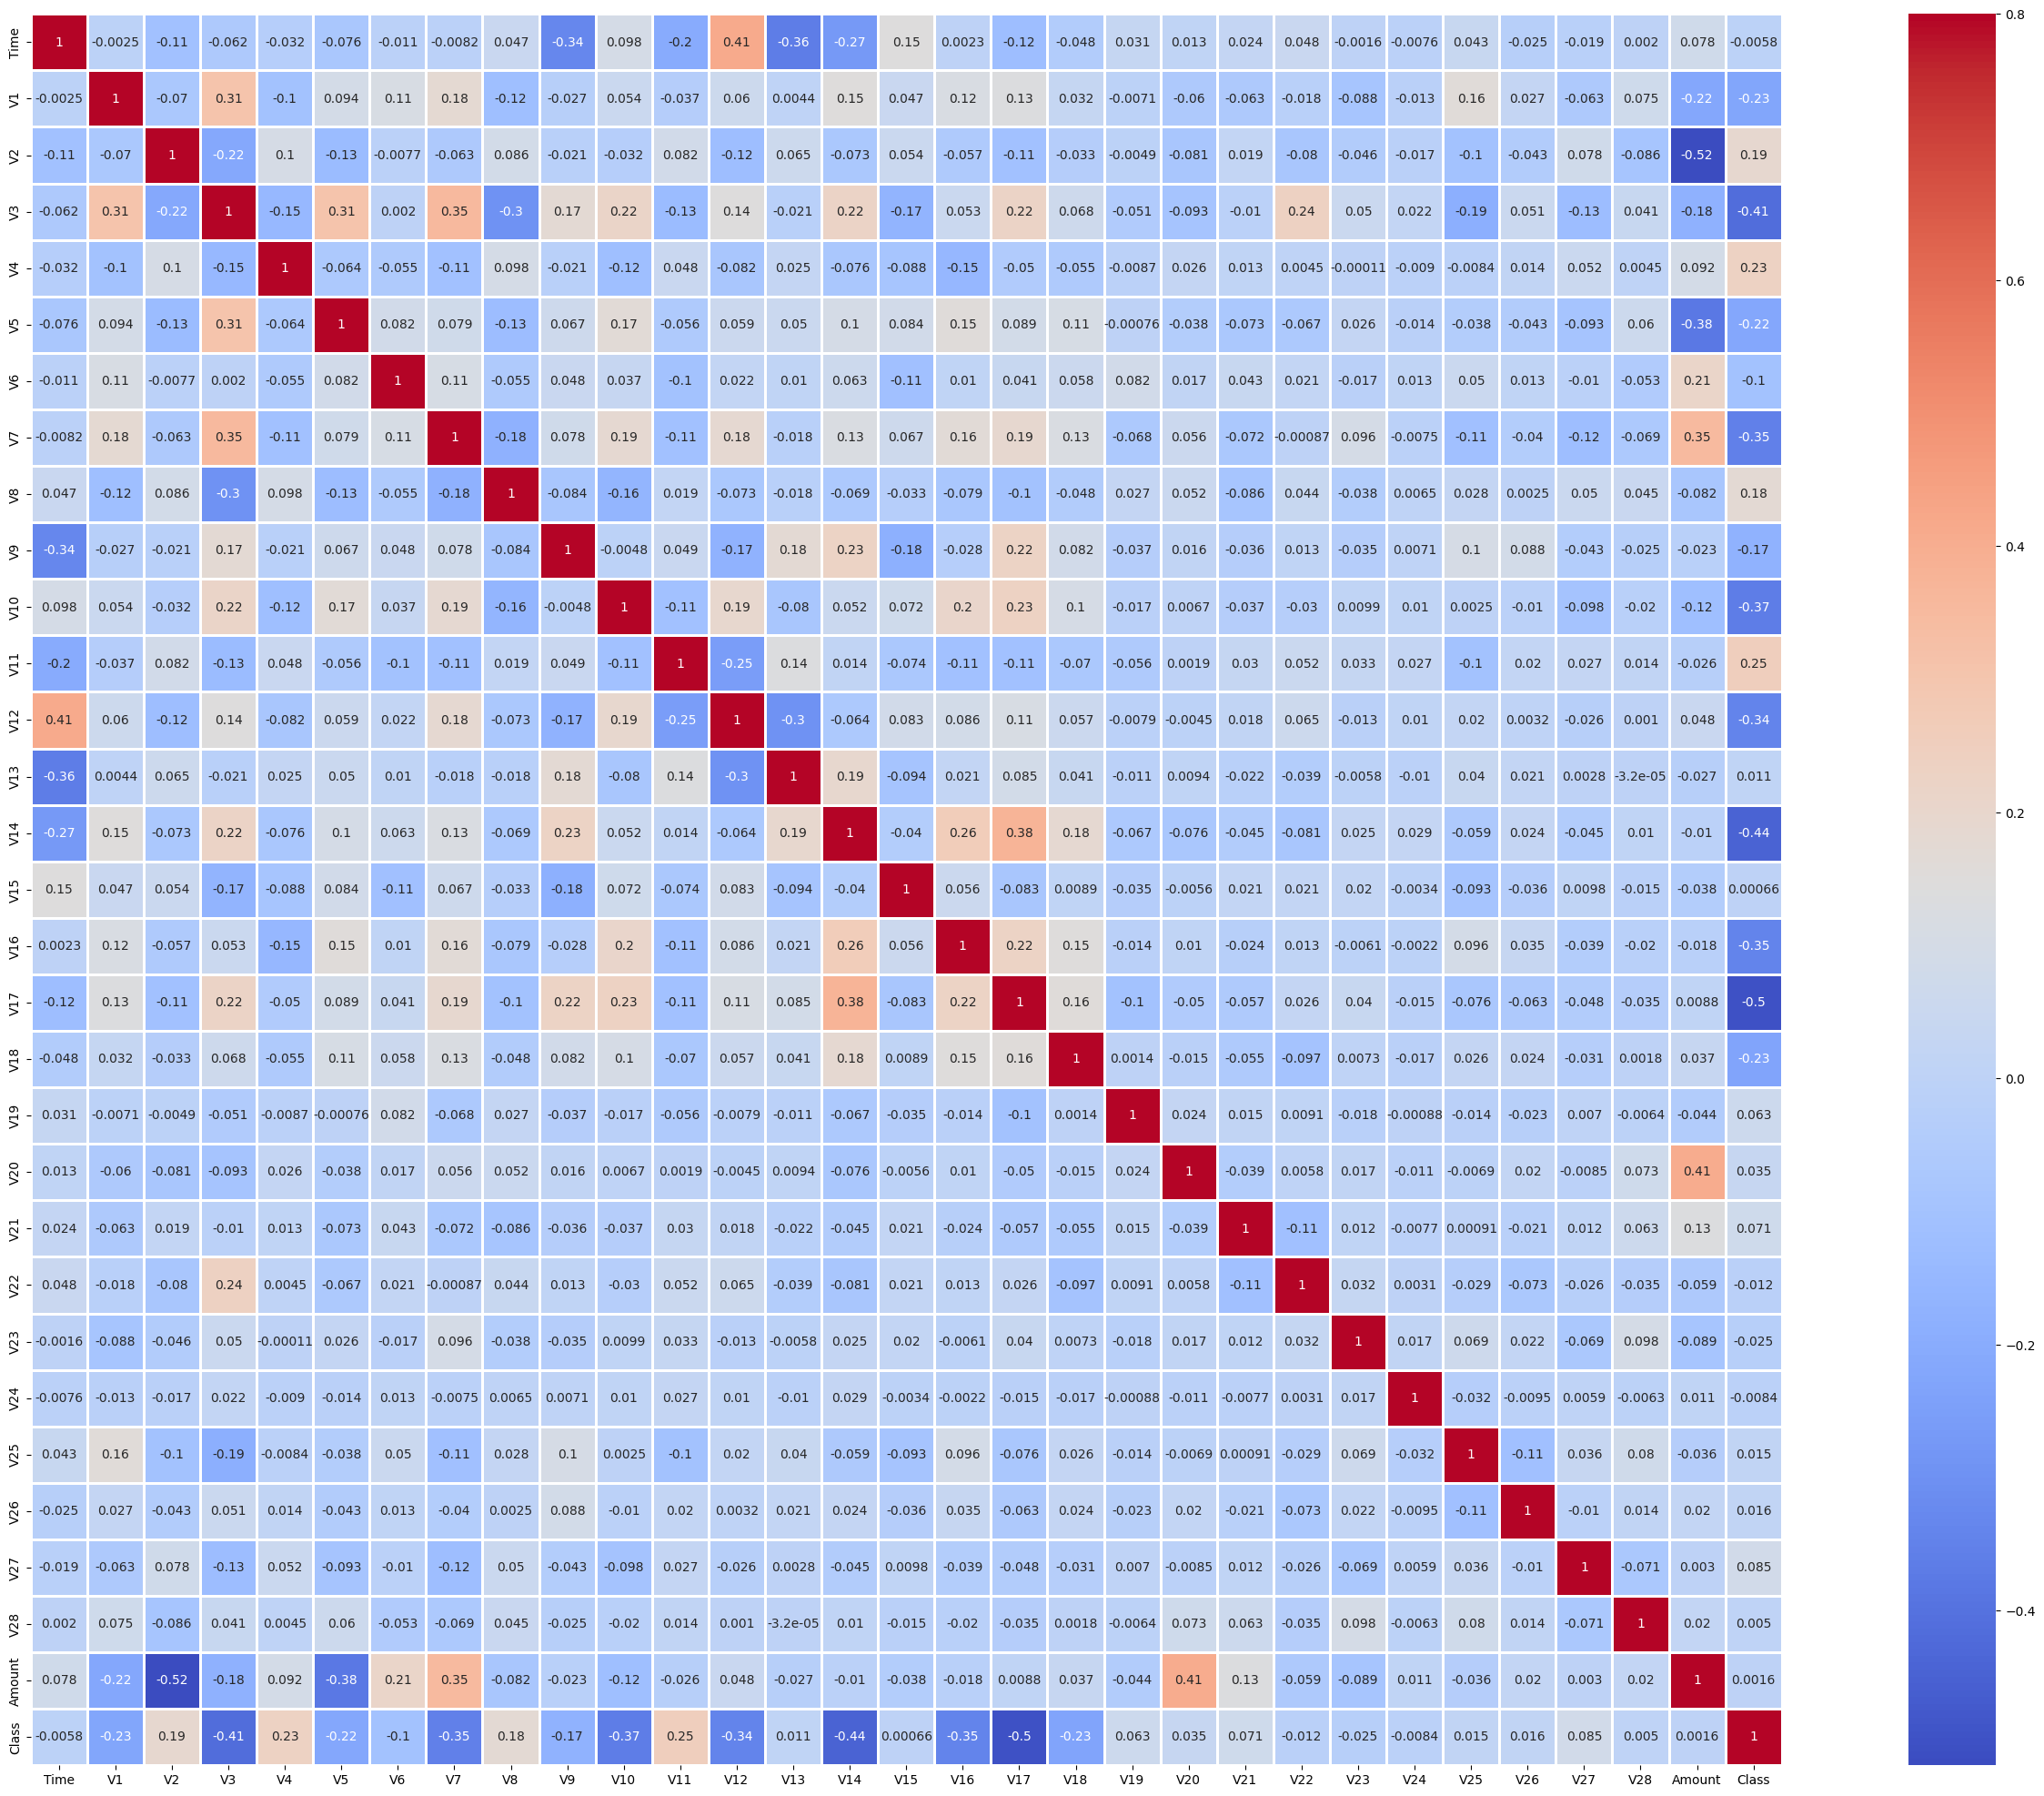

In [35]:
## Correlation matrix EXAMPLE
corrmat=df.corr()
fig=plt.figure(figsize=(36,25))

sns.heatmap(corrmat, vmax = .8, square = True,annot=True,cmap="coolwarm",linewidth=2)
plt.show()

# Data processing

# Splitting a DataFrame into Features (X) and Target (Y)

In this step, we’ll split the given DataFrame into two parts:

Features (X): These are the columns that we’ll use as input to our machine learning model. They represent the independent variables that help predict the target variable.

Target (Y): This is the column we want to predict. In our case, it’s the “Class” column.

## Instructions:

1. Get All Columns: First, let’s get a list of all the columns in the DataFrame. We’ll use this list to filter out the columns we don’t want.
2. Filter Columns: Remove any columns that are not relevant for our prediction.

In our case, we want to exclude the “Class” column from the features.
Store Variables:
X: Assign the remaining columns (excluding “Class”) to the variable X. These will be our features.
Y: Assign the “Class” column to the variable Y. This will be our target.
Print Shapes: Finally, print the shapes of X and Y to verify that everything is set up correctly.

In [36]:
# Get all the columns from the dataFrame  [Note: use .tolist()]
columns = df.columns.tolist()
print(columns)

# Filter the columns to remove data we do not want (Remove Class columns, because that is our target). store under columns variable.
columns.remove('Class')
print(columns)

# Store the variable we'll be predicting on. store under target variable.
target = 'Class'

X = df[columns]  # all the columns data there except class
Y = df[target]   # only Class columns data there


# Print shapes
print(X.shape)
print(Y.shape)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
(45645, 30)
(45645,)


## Split data into Train and test datset (20% test and 80% train)

[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [37]:
# Split data into 80% train and 20% test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
#Print shapes of train and test sets of X and Y.

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(36516, 30)
(9129, 30)
(36516,)
(9129,)


### Feature Scaling (Example)
#### Converting different units and magnitude data in one unit.
Note that this is general procedure, that is followed. This doesn't make a difference in this dataset, but it is done here as an example. [Docs](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)  # convert all data into float data type
X_test_sc=sc.transform(X_test)
X_test_sc.dtype

dtype('float64')

# 3.Machine Learning Model Building

#### We have clean data to build the Ml model. But which Machine learning algorithm is best for the data we have to find. The output is a categorical format so we will use supervised classification machine learning algorithms.

#### To build the best model, we have to train and test the dataset with multiple Machine Learning algorithms then we can find the best ML model.

#### import packages

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

## Decision Tree Classifier
**[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**

**[Read for finding accuracy score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)**

In [41]:
# Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy",random_state=20)
clf.fit(X_train,y_train)
y_pred_dt=clf.predict(X_test)
accuracy_score(y_test,y_pred_dt)
#Write code here:  (TRAIN TREE, AND PRINT ACCURACY SCORE)


0.9984664256764159

In [43]:
# train with Standard Scalar, (instead of X_train, fit on X_train_sc and X_test_sc, achieve by scaling)
clf_sc = DecisionTreeClassifier(criterion="entropy",random_state=20)
clf_sc.fit(X_train_sc,y_train)
y_pred_dt_sc=clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_dt_sc)


0.9984664256764159

## Random Forest Classifier

In [44]:
# Random forest classifier, fit on Xtrain achieved by splitting
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)
rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.9994522948844342

In [45]:
# train with Standard Scalar, (instead of X_train, fit on X_train_sc and X_test_sc, achieve by scaling)
rf_clf_sc=RandomForestClassifier(n_estimators=20,criterion="entropy",random_state=5)
rf_clf_sc.fit(X_train_sc,y_train)
y_pred_rf_sc=rf_clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_rf_sc)

0.9994522948844342

##  AdaBoost Classifier

Treat as example

In [46]:
# Adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abd_clf=AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
                                                  n_estimators=200,
                                                   learning_rate=0.1,
                                                   algorithm="SAMME.R",
                                                   random_state=1, )

abd_clf.fit(X_train,y_train)
y_pred_abd=abd_clf.predict(X_test)
accuracy_score(y_test,y_pred_abd)

0.9986855077226421

In [47]:
# Train with Standard Scalar, fit on X_train_sc achieved by scaling
abd_clf_sc=AdaBoostClassifier(DecisionTreeClassifier(criterion="entropy",random_state=20),
                             n_estimators=200,
                             learning_rate=0.1,
                             algorithm="SAMME.R",
                             random_state=1,)
abd_clf_sc.fit(X_train_sc,y_train)
y_pred_abd_sc=abd_clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_abd_sc)

0.9986855077226421

##  XGBoost Classifier

[Docs](https://xgboost.readthedocs.io/en/stable/python/python_api.html)

In [49]:
#Train using XGBoost XGBClassifier. Search it up online, and implement similar to the AdaBoost Classifier above
from xgboost import XGBClassifier
xgb_clf=XGBClassifier(n_estimators=20,learning_rate=0.1,random_state=1)
xgb_clf.fit(X_train,y_train)
y_pred_xgb=xgb_clf.predict(X_test)
accuracy_score(y_test,y_pred_xgb)

0.9992332128382079

In [50]:
# train with Standard Scalar, (instead of X_train, fit on X_train_sc and X_test_sc, achieve by scaling)
xgb_clf_sc = XGBClassifier(n_estimators=20,learning_rate=0.1,random_state=1)
xgb_clf_sc.fit(X_train_sc,y_train)
y_pred_xgb_sc=xgb_clf_sc.predict(X_test_sc)
accuracy_score(y_test,y_pred_xgb_sc)

0.9992332128382079

## Confusion Matrix
[Docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [51]:
#create confusion matrix under the name "cm"
cm = confusion_matrix(y_test, y_pred_dt)
cm

array([[9090,    6],
       [   8,   25]])

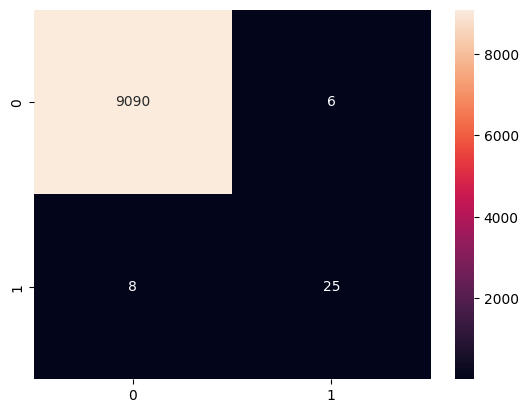

In [52]:
#plot the matrix using the seaborn library. REFER: https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(cm,annot=True,fmt="d")
plt.show()


## Classification report of model

Print a classification report: [docs](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)

In [53]:
#print classification report:
report  = classification_report(y_test, y_pred_dt)
print(report)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9096
         1.0       0.81      0.76      0.78        33

    accuracy                           1.00      9129
   macro avg       0.90      0.88      0.89      9129
weighted avg       1.00      1.00      1.00      9129

